epoch 0/5000 loss=0.20889460444450378
epoch 1000/5000 loss=0.20033637285232545
epoch 2000/5000 loss=0.20033327639102935
epoch 3000/5000 loss=0.20032915771007537
epoch 4000/5000 loss=0.20032459795475005
('linear1.weight', Parameter containing:
tensor([[-0.0792, -0.4078],
        [ 0.1391, -0.5447]], requires_grad=True))
('linear1.bias', Parameter containing:
tensor([ 0.1649, -0.2699], requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-0.3095,  0.1456]], requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.0933], requires_grad=True))
---------------------------
output for tensor([1., 0.])=tensor([0.5000], grad_fn=<SigmoidBackward0>)


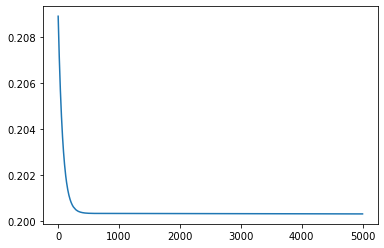

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
inputData=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
outputData=torch.tensor([0,1,1,0],dtype=torch.float32)
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.linear1=nn.Linear(in_features=2,out_features=2,bias=True)
        self.activation1=nn.Sigmoid()
        self.linear2=nn.Linear(in_features=2,out_features=1,bias=True)
        self.activation2=nn.Sigmoid()
    def forward(self,x):
        x=self.linear1(x)
        x=self.activation1(x)
        x=self.linear2(x)
        x=self.activation2(x)
        return x

class myDataset(Dataset):
    def __init__(self,ips,ops):
        self.ips=ips
        self.ops=ops
    def __len__(self):
        return len(self.ips)
    def __getitem__(self, index):
        return self.ips[index],self.ops[index]
batchSize=1
alpha=0.01
data=myDataset(inputData,outputData)
train=DataLoader(data,batch_size=batchSize,shuffle=True)
model=XORModel()
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=alpha)
epochs=5000
lossList=[]
for epoch in range(epochs):
    model.train(True)
    totalloss=0
    for i,data in enumerate(train):
        ip,op=data
        optimizer.zero_grad()
        outputs=model(ip)
        loss=loss_fn(outputs.flatten(),op)
        loss.backward()
        optimizer.step()
        totalloss+=loss.item()
    avg=totalloss/(len(train)+batchSize)
    lossList.append(avg)
    if(epoch%1000==0):
        print(f"epoch {epoch}/{epochs} loss={avg}")

for param in model.named_parameters():
    print(param)
import matplotlib.pyplot as plt
plt.plot(lossList)
test=torch.tensor([1,0],dtype=torch.float32)
model.eval()
testop=model(test)
print("---------------------------")
print(f"output for {test}={testop}")

epoch 0/5000 loss=0.3473120857961476
epoch 1000/5000 loss=2.3504929049522617e-05
epoch 2000/5000 loss=2.6080471116074477e-11
epoch 3000/5000 loss=6.021849685566849e-12
epoch 4000/5000 loss=5.495337518368615e-12
('linear1.weight', Parameter containing:
tensor([[-0.8302,  0.8302],
        [-1.2069,  1.2069]], requires_grad=True))
('linear1.bias', Parameter containing:
tensor([8.3024e-01, 9.1065e-09], requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-1.2045,  1.6571]], requires_grad=True))
('linear2.bias', Parameter containing:
tensor([1.0000], requires_grad=True))
---------------------------
output for tensor([1., 0.])=tensor([1.0000], grad_fn=<ReluBackward0>)


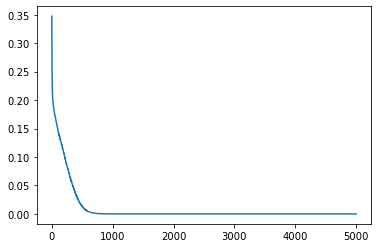

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
inputData=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
outputData=torch.tensor([0,1,1,0],dtype=torch.float32)
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.linear1=nn.Linear(in_features=2,out_features=2,bias=True)
        self.activation1=nn.ReLU()
        self.linear2=nn.Linear(in_features=2,out_features=1,bias=True)
        self.activation2=nn.ReLU()
    def forward(self,x):
        x=self.linear1(x)
        x=self.activation1(x)
        x=self.linear2(x)
        x=self.activation2(x)
        return x

class myDataset(Dataset):
    def __init__(self,ips,ops):
        self.ips=ips
        self.ops=ops
    def __len__(self):
        return len(self.ips)
    def __getitem__(self, index):
        return self.ips[index],self.ops[index]
batchSize=1
alpha=0.01
data=myDataset(inputData,outputData)
train=DataLoader(data,batch_size=batchSize,shuffle=True)
model=XORModel()
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=alpha)
epochs=5000
lossList=[]
for epoch in range(epochs):
    model.train(True)
    totalloss=0
    for i,data in enumerate(train):
        ip,op=data
        optimizer.zero_grad()
        outputs=model(ip)
        loss=loss_fn(outputs.flatten(),op)
        loss.backward()
        optimizer.step()
        totalloss+=loss.item()
    avg=totalloss/(len(train)+batchSize)
    lossList.append(avg)
    if(epoch%1000==0):
        print(f"epoch {epoch}/{epochs} loss={avg}")

for param in model.named_parameters():
    print(param)
import matplotlib.pyplot as plt
plt.plot(lossList)
test=torch.tensor([1,0],dtype=torch.float32)
model.eval()
testop=model(test)
print("---------------------------")
print(f"output for {test}={testop}")